In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/sudoku.png' , cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray , 50 , 150 , apertureSize = 3)
lines = cv.HoughLines(edges , 1 , np.pi/180 , 185)

for line in lines:
    rho , theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 , y0 = a*rho , b*rho
    x1 , y1 = int(x0 + 1000*(-b)) , int(y0 + 1000*(a))
    x2 , y2 = int(x0 - 1000*(-b)) , int(y0 - 1000*(a))
    cv.line(img , (x1,y1) , (x2,y2) , (0,0,255) , 2)

cv.namedWindow("Image" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image" , gray)
cv.waitKey()
cv.imshow("Image" , edges)
cv.waitKey()
cv.imshow("Image" , img)
cv.waitKey()
cv.destroyAllWindows()

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/coins.jpg' , cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray , cv.HOUGH_GRADIENT , 1 , 20 , param1=50 , param2=30, minRadius=0 , maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0 , :]:
    cv.circle(img , (i[0], i[1]) , i[2] , (0 , 255 , 0) , 2)
    cv.circle(img , (i[0], i[1]) , 2 , (0 , 0 , 255) , 3)

cv.namedWindow("Image" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image" , gray)
cv.waitKey()
cv.imshow("Image" , img)
cv.waitKey()
cv.destroyAllWindows()

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread(r'images/pic1.png' , cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ = cv.imread(r'images/templ.png' , cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

img_edges = cv.Canny(img , 50 , 250)
templ_edges = cv.Canny(templ , 50 , 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(img_edges)

out = cv.cvtColor(img , cv.COLOR_BAYER_BG2BGR)

for x,y,scale,orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x-halfWidth) , int(y-halfHeight))
    p2 = (int(x+halfWidth) , int(y+halfHeight))
    print("x = {} , y = {} , scale = {} , orientation = {} , p1 = {} , p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out , p1, p2 , (0 , 0 , 255))


cv.namedWindow("Image" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image" , templ)
cv.waitKey()
cv.imshow("Image" , out)
cv.waitKey()
cv.destroyAllWindows()

x = 29.0 , y = 109.0 , scale = 1.0 , orientation = 0.0 , p1 = (4, 76) , p2 = (54, 141)


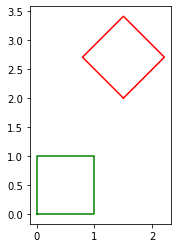

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

a , b , c , d = [0 , 0 , 1] , [0 , 1 , 1] , [1 ,1 , 1] , [1, 0 , 1]
X = np.array([a , b, c, d]).T

theta = np.pi * 45 /180
s = 1
tx , ty = 1.5, 2
H = np.array([[s*np.cos(theta) , -s*np.sin(theta) , tx] , [s*np.sin(theta) , s*np.cos(theta) , ty] , [0 , 0 , 1]])
Y = H @ X

x = np.append(X[0 , :] , X[0,0])
y = np.append(X[1 , :] , X[1 , 0])
fig , ax = plt.subplots()
ax.plot(x , y , color = 'g')
ax.set_aspect('equal')

x = np.append(Y[0 , :] , Y[0,0])
y = np.append(Y[1 , :] , Y[1 , 0])
ax.plot(x , y , color = 'r')
ax.set_aspect('equal')


In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread(r'images/img1.ppm' , cv.IMREAD_ANYCOLOR)
assert img is not None
img4 = cv.imread(r'images/img4.ppm' , cv.IMREAD_ANYCOLOR)
assert img is not None

h = []
with open(r'images/H1to4p') as f:
    h = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(img4 , np.linalg.inv(h) , (2000,2000))

cv.namedWindow("Image 1" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1" , img1)
cv.waitKey()
cv.namedWindow("Image 2" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image 2" , img4)
cv.waitKey()
cv.namedWindow("Image 1 warped" , cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1 warped" , im1to4)
cv.waitKey()
cv.destroyAllWindows()